# CS 594 Project 

In [1]:
## import lib 

from helper import read_csv, calculate_spread, calculate_height, filter_points, cal_nn_distance, run_queries, generate_random_queries, sample_n_points

from tree import QuardTree
from tree.points import Point
from tree.boundingBox import BoundingBox
from tree.quardtreeDynamic import QuardTreeDynamic


import time
import random
import numpy as np
import pandas as pd



## Problem 1: Quad-Tree Construction and Properties [25 Points]

1. **Task**:
   - Implement a quad-tree (not compressed) for approximate nearest neighbor (ANN) queries in any dimension.
   - Input data:
     - A text file with the first line as the dimension `d`.
     - Subsequent lines as tuples representing points in \( \mathbb{R}^d \).

2. **Requirements**:
   - Construct the quad-tree for the input dataset.
   - **Metrics to Report**:
     - Construction time.
     - Spread of the point set.
     - Height of the tree.
   - Describe the relationship between the spread and the height.

In [2]:
# reading csv file
dim, data_points = read_csv("./sample_data/data.csv")

# building quard tree
st = time.time()
qt = QuardTree()
qt.build(points=data_points)
ed = time.time()

print(f"Construction Time : {ed-st} seconds")

Construction Time : 0.07299923896789551 seconds


In [3]:
## calculating spread and height
spread = calculate_spread(data_points)
print(f"Spread of dataset : {spread}")

height = calculate_height(qt.root)
print(f"Height of tree: {height}")

print(f"Relationship between spread and height, ceil(log(spread)): {np.ceil(np.log2(spread))} == height of tree ({height})")

Spread of dataset : 15550.613705736101
Height of tree: 14
Relationship between spread and height, ceil(log(spread)): 14.0 == height of tree (14)


## Problem 2: Approximate Nearest Neighbor Queries [25 Points]

1. **Task**:
   - Implement \( (1+\epsilon) \)-approximate nearest neighbor queries for \( \epsilon = \{0.05, 0.1, 0.15, 0.2, 0.25\} \).
   - Use query points:
     - \( q_0 = (500, 500) \)
     - \( q_1 = (1000, 1000) \)
     - \( q_2 = (30, 950) \)
     - \( q_3 = (0, 1020) \)

2. **Visualizations**:
   - Plot:
     - \( \epsilon \) (x-axis)
     - Distance between query point and nearest neighbor (y-axis).

3. **Experiments**:
   - **Experiment 1**:
     - Fix \( \epsilon = 0.1 \).
     - Run 1000 random queries in the box \([0, 1000] \times [0, 1000]\).
     - Report:
       - Average query time.
       - Average distance between query point and nearest neighbor.
   - **Experiment 2**:
     - Repeat the above for box \([1000, 1500] \times [1000, 1500]\).

<Axes: title={'center': 'Query Points'}, xlabel='epsilons', ylabel='distances'>

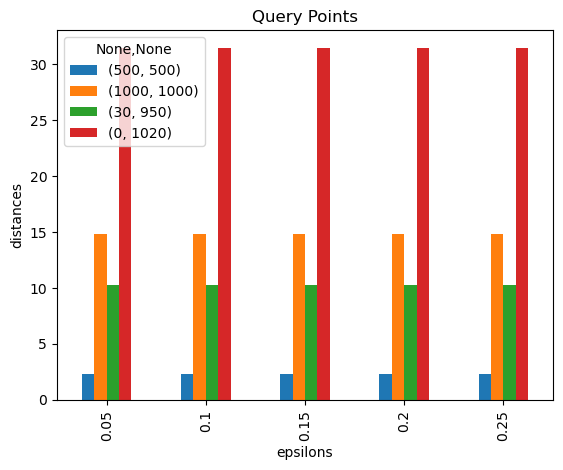

In [4]:
## sample eps and point as given in question
epsilons = [0.05, 0.1, 0.15, 0.2, 0.25]
points = [Point(500, 500), Point(1000, 1000), Point(30, 950), Point(0, 1020)]

distance_ann = cal_nn_distance(points, epsilons, qt)

# plot distance 
pd.DataFrame(distance_ann).plot(kind='bar', xlabel="epsilons", ylabel="distances", title="Query Points")

In [5]:
# running random quertines in given boxes for eps=0.1

# Set fixed epsilon
ep = 0.1

# Run queries for the first region [0, 1000] x [0, 1000]
region1_min = (0, 0)
region1_max = (1000, 1000)
avg_distance_region1, avg_query_time_region1 = run_queries(region1_min, region1_max, ep, qt)

# Output the results
print(f"Average Distance in [0, 1000] x [0, 1000]: {avg_distance_region1}")
print(f"Average Query Time in [0, 1000] x [0, 1000]: {avg_query_time_region1} seconds")

# Run queries for the second region [1000, 1500] x [1000, 1500]
region2_min = (1000, 1000)
region2_max = (1500, 1500)
avg_distance_region2, avg_query_time_region2 = run_queries(region2_min, region2_max, ep, qt)


print(f"Average Distance in [1000, 1500] x [1000, 1500]: {avg_distance_region2}")
print(f"Average Query Time in [1000, 1500] x [1000, 1500]: {avg_query_time_region2} seconds")


Average Distance in [0, 1000] x [0, 1000]: 5.001824605561851
Average Query Time in [0, 1000] x [0, 1000]: 0.00011699962615966798 seconds
Average Distance in [1000, 1500] x [1000, 1500]: 395.00819943267607
Average Query Time in [1000, 1500] x [1000, 1500]: 8.499932289123535e-05 seconds


## Problem 3: Deletion in Quad-Tree [25 Points]

1. **Task**:
   - Extend the quad-tree to handle deletions.

2. **Experiments**:
   - Delete points in box \([450, 550] \times [450, 550]\).
     - Report average deletion time.
     - Recreate the \( \epsilon \)-NN query figure from Problem 2.
   - Repeat for box \([900, 1000] \times [900, 1000]\).
   - Delete additional points until the tree is reconstructed:
     - Reconstruct the tree and delete 1000 more points.
     - Report average deletion time and figures for queries \( q_0 \) and \( q_1 \).
   - Compare query times and distances from Problem 2 for boxes \([0, 1000] \times [0, 1000]\) and \([1000, 1500] \times [1000, 1500]\).


Average Deletion Time for all points in box [450, 550] X [450, 550]  0.00025925150624027957


<Axes: title={'center': 'ANN Query (500,500) result after deletion'}, xlabel='epsilon', ylabel='distance'>

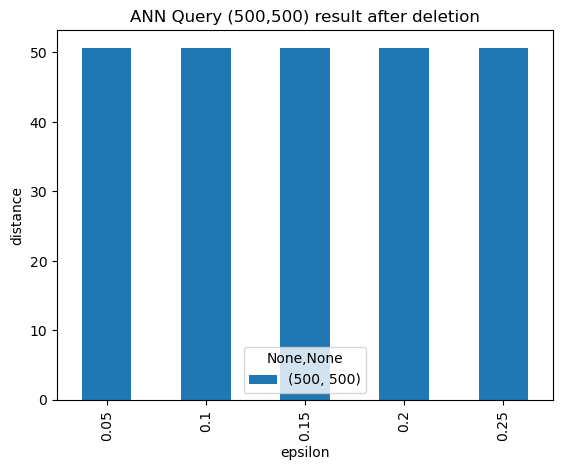

In [6]:
## Delete all outputs for given boxes

### given bounding box
bounding_box = BoundingBox(x_min=450, x_max=550, y_min=450, y_max=550)
# findinal all points to delete
filtered_points = filter_points(data_points, bounding_box=bounding_box)

# deleteting all points that are in the given box
st = time.time()
for point in filtered_points:
    qt.delete(point)
ed = time.time()

avg_time = (ed-st)/len(filtered_points)
print("Average Deletion Time for all points in box [450, 550] X [450, 550] ", avg_time)

# plot as in question 2
n_distance = cal_nn_distance([Point(500, 500)], epsilons, qt)
pd.DataFrame(n_distance).plot(kind='bar', xlabel='epsilon', ylabel='distance', title='ANN Query (500,500) result after deletion')

Average Deletion Time for all points in box [900, 1000] X [900, 1000]  0.0002678377287728446


<Axes: title={'center': 'ANN Query (1000,1000) result after deletion'}, xlabel='epsilon', ylabel='distance'>

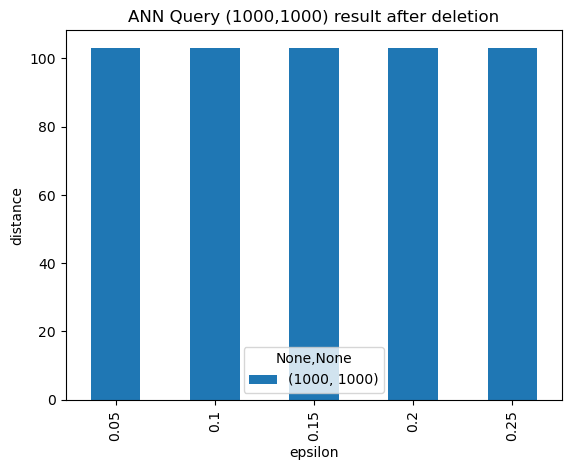

In [7]:
# same process for differnt box

### given bounding box
bounding_box = BoundingBox(x_min=900, x_max=1000, y_min=900, y_max=1000)

# findinal all points to delete
filtered_points = filter_points(data_points, bounding_box=bounding_box)

# deleteting all points that are in the given box
st = time.time()
for point in filtered_points:
    qt.delete(point)
ed = time.time()

avg_time = (ed-st)/len(filtered_points)
print("Average Deletion Time for all points in box [900, 1000] X [900, 1000] ", avg_time)

# plot as in question 2
n_distance = cal_nn_distance([Point(1000, 1000)], epsilons, qt)
pd.DataFrame(n_distance).plot(kind='bar', xlabel='epsilon', ylabel='distance', title='ANN Query (1000,1000) result after deletion')


Deletion futher till we need to reconstruct the tree

In [8]:
## total number of points to delete to trigge rebuild
num_del = qt.total_points/2 - qt.deleted_count+1

# sample num_del points for deletion
points = sample_n_points(data_points, num_del, [BoundingBox(x_min=900, x_max=1000, y_min=900, y_max=1000),
                          BoundingBox(x_min=450, x_max=550, y_min=450, y_max=550)])

In [9]:
# delete points till  total num_of points remaining in quard tree is 499
st = time.time()
for pt in points:
    qt.delete(pt)
ed = time.time()

print("Average del time before reconstruction :", (ed-st)/len(points))

Average del time before reconstruction : 0.00020569444475650688


In [10]:
print(f"Total number of points remaining in quard tree : {len(qt.points)}")

Total number of points remaining in quard tree : 4999


In [11]:
## Deleting 1000 more points from quard tree

r_points = sample_n_points(data_points, 1000, [BoundingBox(x_min=900, x_max=1000, y_min=900, y_max=1000),
                          BoundingBox(x_min=450, x_max=550, y_min=450, y_max=550)], points)

# deleting points
st = time.time()
for pt in r_points:
    qt.delete(pt)
ed = time.time()

print("Average del time for 1000 points after reconstruction :", (ed-st)/len(points))

Average del time for 1000 points after reconstruction : 2.6177771543763317e-05


In [12]:
print(f"Total number of points remaining in quard tree : {len(qt.points)}")

Total number of points remaining in quard tree : 3999


In [13]:
## Quering 1000 random query as per given box

# Set fixed epsilon
ep = 0.1

# Run queries for the first region [0, 1000] x [0, 1000]
region1_min = (0, 0)
region1_max = (1000, 1000)
avg_distance_region1, avg_query_time_region1 = run_queries(region1_min, region1_max, ep, qt)

print(f"Average Distance in [0, 1000] x [0, 1000] after deletion and reconstruction: {avg_distance_region1}")
print(f"Average Query Time in [0, 1000] x [0, 1000] after deletion and reconstruction: {avg_query_time_region1} seconds")


# Run queries for the second region [1000, 1500] x [1000, 1500]
region2_min = (1000, 1000)
region2_max = (1500, 1500)
avg_distance_region2, avg_query_time_region2 = run_queries(region2_min, region2_max, ep, qt)

print(f"Average Distance in [1000, 1500] x [1000, 1500] after deletion and reconstruction: {avg_distance_region2}")
print(f"Average Query Time in [1000, 1500] x [1000, 1500] after deletion and reconstruction: {avg_query_time_region2} seconds")


Average Distance in [0, 1000] x [0, 1000] after deletion and reconstruction: 8.472729284018369
Average Query Time in [0, 1000] x [0, 1000] after deletion and reconstruction: 9.2193603515625e-05 seconds
Average Distance in [1000, 1500] x [1000, 1500] after deletion and reconstruction: 451.03535570050195
Average Query Time in [1000, 1500] x [1000, 1500] after deletion and reconstruction: 7.255887985229492e-05 seconds


## Problem 4: Insertion in Quad-Tree [25 Points]

1. **Task**:
   - Implement insertion into the quad-tree as per [Section 1.1](https://jeffe.cs.illinois.edu/teaching/datastructures/notes/01-statictodynamic.pdf).

2. **Experiments**:
   - Insert 6000 random points into the box \([0, 1000] \times [0, 1000]\).
   - Run \( \epsilon \)-NN queries for query points \( q_0, q_1, q_2, q_3 \) with \( \epsilon = \{0.05, 0.1, 0.15, 0.2, 0.25\} \).
     - Plot distances against \( \epsilon \).
   - Fix \( \epsilon = 0.1 \) and:
     - Run 1000 random queries in \([0, 1000] \times [0, 1000]\).
     - Run 1000 random queries in \([1000, 1500] \times [1000, 1500]\).
   - Insert 20000 points in box \([1000, 2000] \times [1000, 2000]\).
     - Run 1000 random queries in \([1000, 2000] \times [1000, 2000]\).
     - Compare results with queries above.

In [14]:
# xreate a dynamic quard tree as given in document
qtd = QuardTreeDynamic()

In [15]:
## Inserting 6000 points into dynamic quard tree from the given box ([0,1000] X [0,1000])
r_points = generate_random_queries(0,1000,0,1000,6000)

# insert points 
for pt in r_points:
    qtd.insert(pt)

<Axes: title={'center': 'Distance from Query Points after insertions'}, xlabel='epsilons', ylabel='distances'>

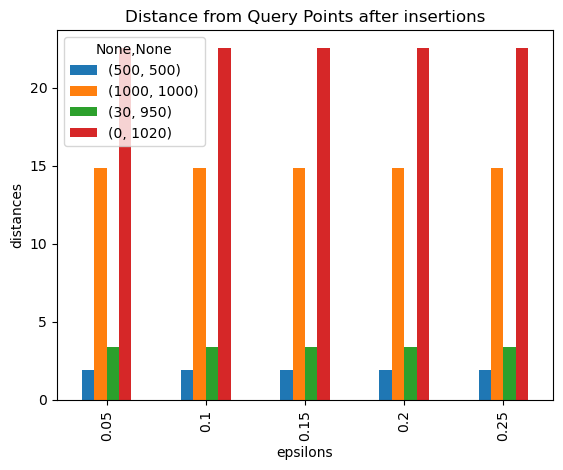

In [16]:
## Run query for givcen eps and points sample 
epsilons = [0.05, 0.1, 0.15, 0.2, 0.25]
points = [Point(500, 500), Point(1000, 1000), Point(30, 950), Point(0, 1020)]

ann_distance = cal_nn_distance(points, epsilons, qtd)
# plot
pd.DataFrame(ann_distance).plot(kind='bar', xlabel="epsilons", ylabel="distances", title="Distance from Query Points after insertions")

In [17]:
# query 1000 sample ANN for given regions 
ep = 0.1

# Run queries for the first region [0, 1000] x [0, 1000]
region1_min = (0, 0)
region1_max = (1000, 1000)
avg_distance_region1, avg_query_time_region1 = run_queries(region1_min, region1_max, ep, qtd)
print(f"Average Distance in [0, 1000] x [0, 1000] from dynamic quard tree: {avg_distance_region1}")
print(f"Average Query Time in [0, 1000] x [0, 1000] from dynamic quard tree: {avg_query_time_region1} seconds")


# Run queries for the second region [1000, 1500] x [1000, 1500]
region2_min = (1000, 1000)
region2_max = (1500, 1500)
avg_distance_region2, avg_query_time_region2 = run_queries(region2_min, region2_max, ep, qtd)


print(f"Average Distance in [1000, 1500] x [1000, 1500] from dynamic quard tree: {avg_distance_region2}")
print(f"Average Query Time in [1000, 1500] x [1000, 1500] from dynamic quard tree: {avg_query_time_region2} seconds")


Average Distance in [0, 1000] x [0, 1000] from dynamic quard tree: 6.583680799034475
Average Query Time in [0, 1000] x [0, 1000] from dynamic quard tree: 0.0003131179809570312 seconds
Average Distance in [1000, 1500] x [1000, 1500] from dynamic quard tree: 399.60737353242234
Average Query Time in [1000, 1500] x [1000, 1500] from dynamic quard tree: 0.0002911257743835449 seconds


In [18]:
# add 20k points from box [1000, 2000] X [1000, 2000] into dynamic quard tree 
r_points = generate_random_queries(1000,2000,1000,2000,20000)

for pt in r_points:
    qtd.insert(pt)

In [19]:
region_min = (1000, 1000)
region_max = (2000, 2000)
avg_distance_region, avg_query_time_region = run_queries(region_min, region_max, ep, qtd)
# Output the results
print(f"Average Distance in [1000, 2000] x[1000, 2000] after insertion 20k values: {avg_distance_region}")
print(f"Average Query Time in [1000, 2000] x [1000, 2000] after insertion 20k values: {avg_query_time_region} seconds")

Average Distance in [1000, 2000] x[1000, 2000] after insertion 20k values: 3.505414572702741
Average Query Time in [1000, 2000] x [1000, 2000] after insertion 20k values: 0.0003958251476287842 seconds
